# 40 组合总和Ⅱ
输入：给定数组candidate和目标数target  
输出：所有可以使数字和为target的组合

ps：candidates中每个元素在每个组合中只能使用一次，且解集中不能包含重复的组合  

本题和39.的区别就在： 不能重复使用元素！! 而且candidates数组中的元素可能是重复的！

## 思路
用树形结构来思考，每一层表示当前取数的轮次所有的选择，高度表示当前取数的轮次

所以，“不能重复”指的是在同一层中，不能取到相同的数字  
但是，同一个树枝上可以读取重复的树  

**强调一下，树层去重的话，需要对数组排序！**

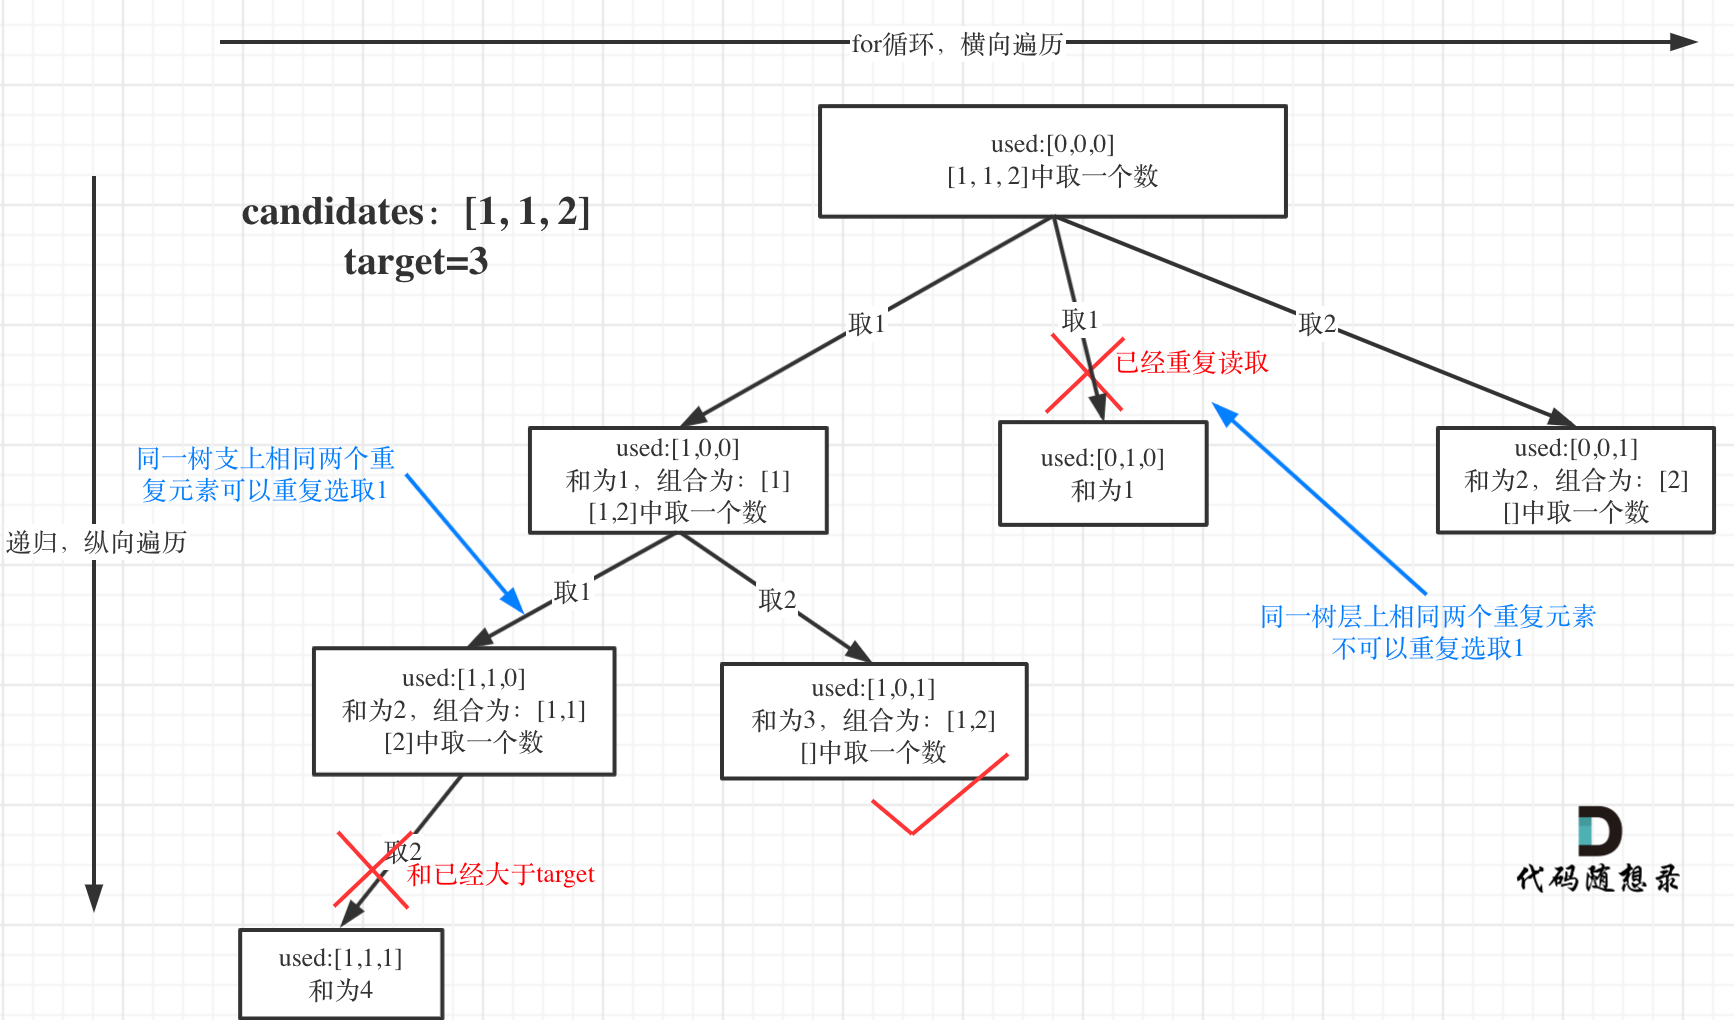

## 回溯三部曲
1. 参数
   - 全局参数：path，result  
   - 其他参数：防止去重的参数used， 来记录同一树枝上的元素是否被使用过  

2. 终止条件
   - 当前和 sum > target ：直接返回  
   - 当前和 sum == target：记录结果并返回  

3. 单层搜索逻辑  
   - used数组大小和candidates相同，每一个位置用 0/1 表示该位置的元素 未使用/已使用    
   - 在当前取的数字和上一次相同（candidates[i] == candidates[i - 1] 都是x）时，  
     - 如果上一个数字没被使用过（used[i - 1] == false），说明x是在同一树层被使用的  
     - 如果上一个数字已经被使用了（used[i - 1] == true），说明已经进入了下一层递归，x是在不同树层的同一树枝被使用的  
     - 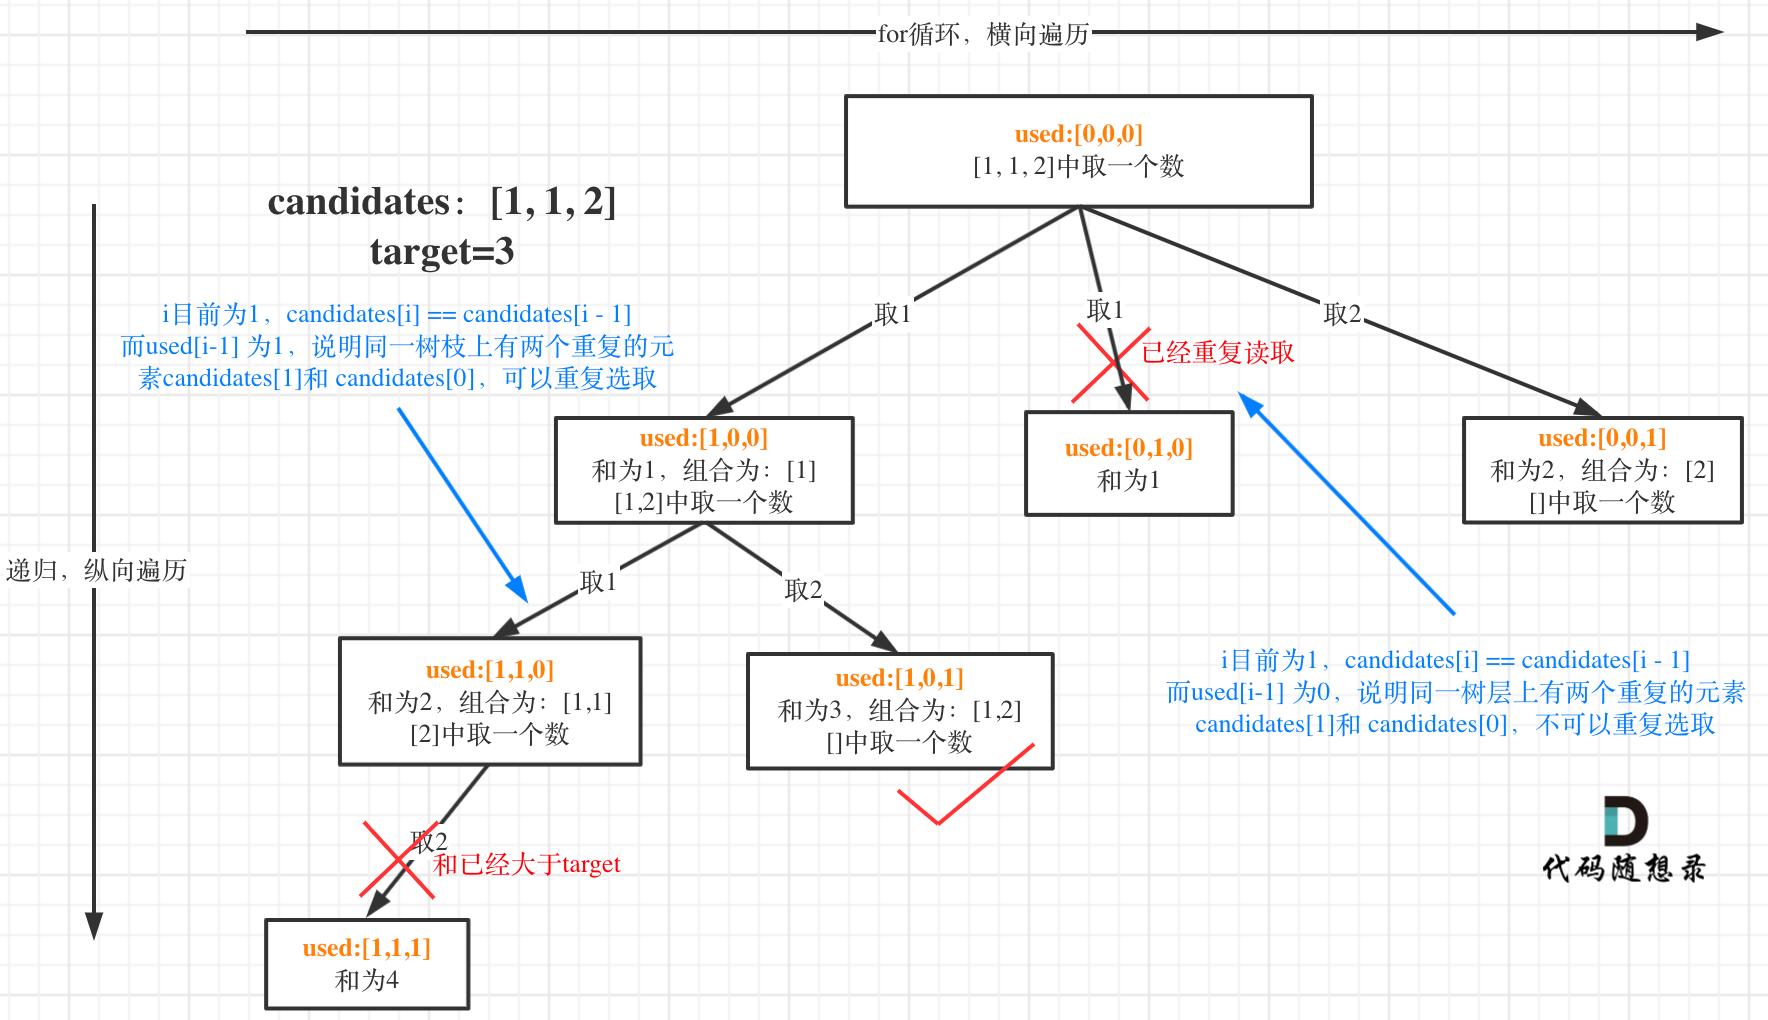  
   - 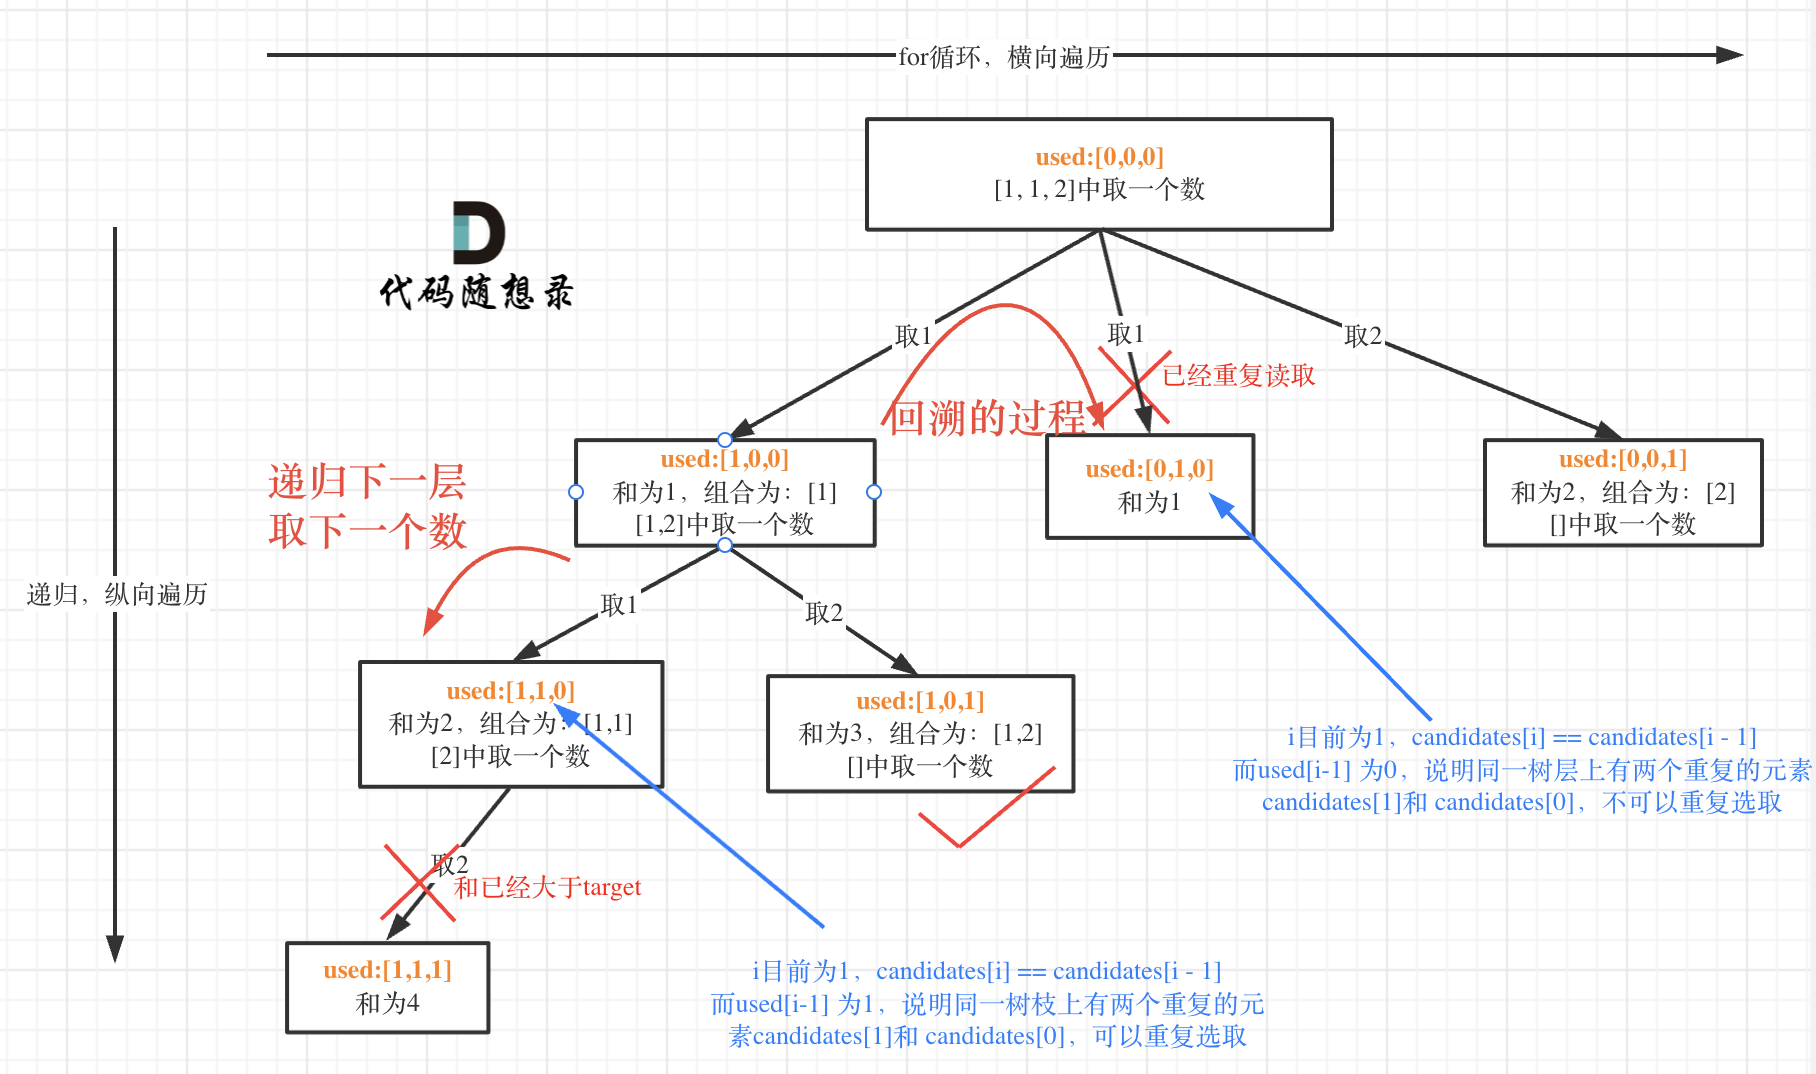

In [ ]:
# 回溯，使用startIndex
class Solution:
    def backtracing(self, candidates, target, sum, startIndex, path, result):
        if sum == target:
            result.append(path[:])
            return
        
        for i in range(startIndex, len(candidates)):
            if i > startIndex and candidates[i] == candidates[i-1]:
                # 进入到下一层递归，而且当前数字和上一个数字相同 —— 不同层可以重复，继续下面的判断
                continue

            if sum + candidates[i] > target:
                break   # 剪枝

            sum += candidates[i]          # 节点处理
            path.append(candidates[i])
            self.backtracing(candidates, target, sum, i+1, path, result)  # 递归遍历，从下一个数字开始判断
            sum -= candidates[i]          # 回溯撤销，和节点处理操作一一对应
            path.pop()

    def combinationSum(self, candidates, target):
        result = []
        self.backtracing(candidates, target, 0, 0, [], result)
        return result

In [ ]:
# 回溯，使用used数组，需要排序
class Solution:
    def backtracing(self, candidates, target, sum, startIndex, used, path, result):
        if sum == target:
            result.append(path[:])
            return
        
        for i in range(startIndex, len(candidates)):
            if i > startIndex and candidates[i] == candidates[i - 1] and not used[i-1]:
                # 如果这一轮取到和上一轮相同的数字，只保留未被使用过的
                continue   # 同一树层不能重复，跳过本次循环进行下一轮取数
            if sum + candidates[i] > target:
                break

            total += candidates[i]
            path.append(candidates[i])
            used[i] = True
            self.backtracing(candidates, target, sum, i+1, used, path, result)
            used[i] = False
            sum -= candidates[i]
            path.pop()

    def combinationSum(self, candidates, target):
        used = [False] * len(candidates)
        result = []
        candidates.sort()   # 先排序
        self.backtracing(candidates, target, 0, 0, used, [], result)
        return result